In [1]:
# import important libraries 
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## for EMM fixed intensity series - Stardist
csv_path = r"/Users/Prags/Desktop/Stardist_analysis /EMM_Fixed_intensity_series_labels/Results_Tables_per_channel"

# store all the files in directory into files_list
files_list = os.listdir(csv_path)

# list of channel identifiers
channel_ids = []
for i in range(1,6):
    channel_ids.append(f'Channel{i}')
    
# dictionary for channel and combined dataframes
intensity_dict = {}
    
# loop through each intensity
for channel in channel_ids:
    
    # list of csvs for this intensity
    csvs_this_intensity = []
    dfs_this_intensity = []
    
    # loop through file list, find corresponding intensity
    for filename in files_list:
        if channel in filename:
            csvs_this_intensity.append(filename)
            dfs_this_intensity.append(pd.read_csv(os.path.join(csv_path, filename)))
            
    # concatenate dataframes for this intensity
    df_concat = pd.concat(dfs_this_intensity)
        
    # add to dictionary
    # key = channel name
    # value = concatenated dataframes
    intensity_dict[channel] = df_concat
    
    
    df_concat.to_csv(os.path.join(csv_path, f"All_{channel}.csv"))

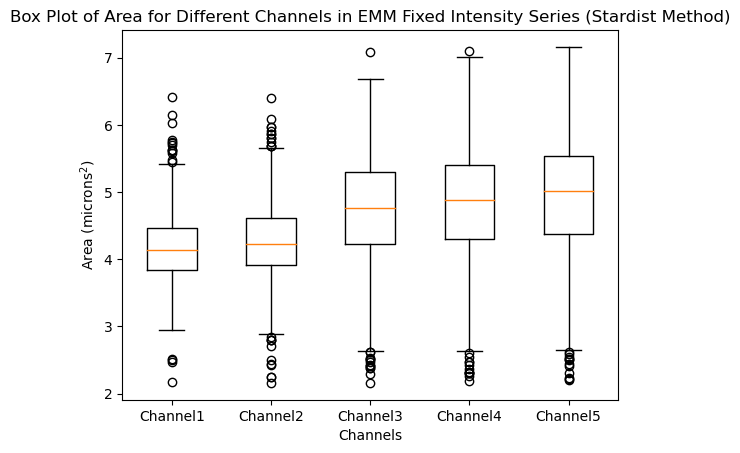

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# List to store the Area data for each channel
area_data = []
channel_labels = []

for channel, df in intensity_dict.items():
    if 'Area' in df.columns:  
        area_data.append(df['Area'])
        # Use the channel name as a label
        channel_labels.append(channel)  

# Create the box plot
plt.boxplot(area_data, labels=channel_labels)

# Add labels and title
plt.title('Box Plot of Area for Different Channels in EMM Fixed Intensity Series (Stardist Method)')
plt.xlabel('Channels')
plt.ylabel('Area (microns$^2$)')

# Show the plot
plt.show()